# 02-1 훈련 세트와 테스트 세트
- 지도 학습과 비지도 학습
- 훈련 세트와 테스트 세트로 데이터를 나눠서 학습
- 샘플링 편향

In [14]:
# 생선 길이와 무게 데이터셋
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

# 생선 길이와 무게를 2차원 리스트로
fish_data = [[l, w] for l, w in zip(fish_length, fish_weight)]  # 49개의 샘플 데이터
fish_target = [1]*35 + [0]*14  # label

In [15]:
# 모델 객체 만들기
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

In [16]:
# 훈련 세트로 입력값 중 0부터 34번째 인덱스까지 사용
train_input = fish_data[:35]
# 훈련 세트 타겟값
train_target = fish_target[:35]
# 테스트 세트 입력값
test_input = fish_data[35:]
# 테스트 세트 타겟값
test_target = fish_target[35:]

In [17]:
# 모델 훈련
kn.fit(train_input, train_target)
# 평가
kn.score(test_input, test_target)

# 정확도 0.0인 이유: 훈련 세트에 도미와 빙어를 골고루 섞어야하는데 도미만 넣고 훈련했으므로 -> 샘플링 편향

0.0

In [18]:
# 생선 데이터를 2차원 넘파이 배열로 변환하기
import numpy as np

input_arr = np.array(fish_data)  # 49 x 2
target_arr = np.array(fish_target)  # 49 x 1

print(input_arr)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


In [19]:
# 훈련 세트를 섞기 - 인덱스를 랜덤으로 뽑는 방법
np.random.seed(42)
index = np.arange(49) # index는 1차원 리스트
np.random.shuffle(index)

In [20]:
# train data set 다시 만들기
train_input = input_arr[index[:35]] # index는 1차원 리스트
train_target = target_arr[index[:35]]

# test set 다시 만들기
test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

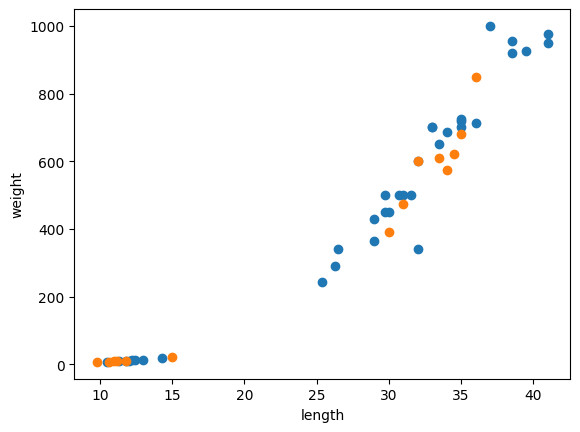

In [21]:
# 훈련 세트와 데이터 세트에 도미와 빙어가 잘 섞여 있는지 확인
import matplotlib.pyplot as plt
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(test_input[:, 0], test_input[:, 1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [22]:
# 새로운 머신 만들기
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [25]:
# 예측값과 실제값 비교하기
print('예측값:', kn.predict(test_input))
print('실제값:', test_target)

예측값: [0 0 1 0 1 1 1 0 1 1 0 1 1 0]
실제값: [0 0 1 0 1 1 1 0 1 1 0 1 1 0]
